In [1]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
from stock import Stock


In [5]:
start = datetime.datetime(1999, 1, 1)
end = datetime.datetime(2020, 1, 1)
spy = web.DataReader('spy', 'yahoo', start, end)[['Close']]
spyData=Stock('spy',start,end)
spyData.stockData


,Close,Volume,MA20,MA60,MA120,MA250,EMA20,EMA60,EMA120,EMA250,MAScore,PriceScore,SumScore,Chg,%Chg
Date,,,,,,,,,,,,,,,
1999-01-04,123.03,9450400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,,0
1999-01-05,124.44,8031000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.41,1.15%
1999-01-06,127.44,7737700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,3.0,2.41%
1999-01-07,126.81,5504900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-0.63,-0.49%
1999-01-08,127.75,6224400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.94,0.74%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,321.23,20270000.0,316.1215,306.9680,301.159333,290.15928,316.619682,309.291169,302.683993,293.746059,100.0,100.0,100.0,0.01,0.0%
2019-12-26,322.94,30911200.0,316.5645,307.4630,301.377000,290.46004,317.221617,309.738672,303.018803,293.978680,100.0,100.0,100.0,1.71,0.53%
2019-12-27,322.86,42528800.0,316.9335,308.0430,301.590917,290.75180,317.758606,310.168880,303.346756,294.208810,100.0,100.0,100.0,-0.08,-0.02%


In [6]:

increaseRate = 0.02
amount = 5000
Index = 0
cycle = 20
sharePrice = spy.values[Index][0]
shares = round(amount/sharePrice)
shareValue = shares*sharePrice
ininData = [[spy.index[Index], shareValue, 0, Index, sharePrice, 0,
             shares, shares, shareValue, shareValue, shareValue, sharePrice, 0, 0]]
dfValueAverage = pd.DataFrame(ininData, columns=['Date', 'TargetShareValue', 'ShareValueBeforePurchase', 'PriceIndex', 'SharePrice',  'newEarning', 'DeltaShare', 'Shares',
                                                 'PurchaseValue', 'ShareValue', 'Cost', 'ShareCost', 'Earning', 'EarningRate'])
index = dfValueAverage.iloc[0]['PriceIndex']


In [8]:
for i in range(1, 120):
    previousData = dfValueAverage.iloc[i-1]
    newIndex = previousData['PriceIndex']+cycle
    currentSharePrice = spy.values[newIndex][0]
    currentShareValueBeforePurchase = currentSharePrice*previousData['Shares']
    newEarning = currentShareValueBeforePurchase-previousData['ShareValue']
    targetShareValue = previousData['ShareValue']*(1+increaseRate)
    deltaShare = math.ceil(
        (targetShareValue-currentShareValueBeforePurchase)/currentSharePrice)
    currentShares = previousData['Shares']+deltaShare
    purchaceValue = deltaShare*currentSharePrice
    currentCost = previousData['Cost']+purchaceValue
    currentShareValue = currentShares*currentSharePrice
    currentEarning = currentShareValue-currentCost
    currentEarningRate = currentEarning*100/currentCost
    shareCost = currentCost/currentShares
    newData = [spy.index[newIndex], targetShareValue, currentShareValueBeforePurchase, newIndex, currentSharePrice, newEarning, deltaShare, currentShares,
               purchaceValue, currentShareValue, currentCost, shareCost, currentEarning, currentEarningRate]
    dfValueAverage.loc[i] = newData


In [9]:
dfValueAverage


,Date,TargetShareValue,ShareValueBeforePurchase,PriceIndex,SharePrice,newEarning,DeltaShare,Shares,PurchaseValue,ShareValue,Cost,ShareCost,Earning,EarningRate
0,1999-01-04,5044.281250,0.000000,0,123.031250,0.000000,41,41,5044.281250,5044.281250,5044.281250,123.031250,0.000000,0.000000
1,1999-02-02,5145.166875,5171.125000,20,126.125000,126.843750,0,41,0.000000,5171.125000,5044.281250,123.031250,126.843750,2.514605
2,1999-03-03,5274.547500,5062.218750,40,123.468750,-108.906250,2,43,246.937500,5309.156250,5291.218750,123.051599,17.937500,0.339005
3,1999-03-31,5415.339375,5520.125000,60,128.375000,210.968750,0,43,0.000000,5520.125000,5291.218750,123.051599,228.906250,4.326154
4,1999-04-29,5630.527500,5776.781250,80,134.343750,256.656250,-1,42,-134.343750,5642.437500,5156.875000,122.782738,485.562500,9.415828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2008-02-27,73888.832591,73671.260651,2300,138.220001,1231.228699,2,535,276.440002,73947.700653,65078.729095,121.642484,8868.971558,13.628065
116,2008-03-27,75426.654666,71037.299347,2320,132.779999,-2910.401306,34,569,4514.519958,75551.819305,69593.249054,122.307995,5958.570251,8.561995
117,2008-04-24,77062.855692,78704.084167,2340,138.320007,3152.264862,-11,558,-1521.520081,77182.564087,68071.728973,121.992346,9110.835114,13.384169
118,2008-05-22,78726.215369,77846.576935,2360,139.509995,664.012848,7,565,976.569962,78823.146896,69048.298935,122.209379,9774.847961,14.156537


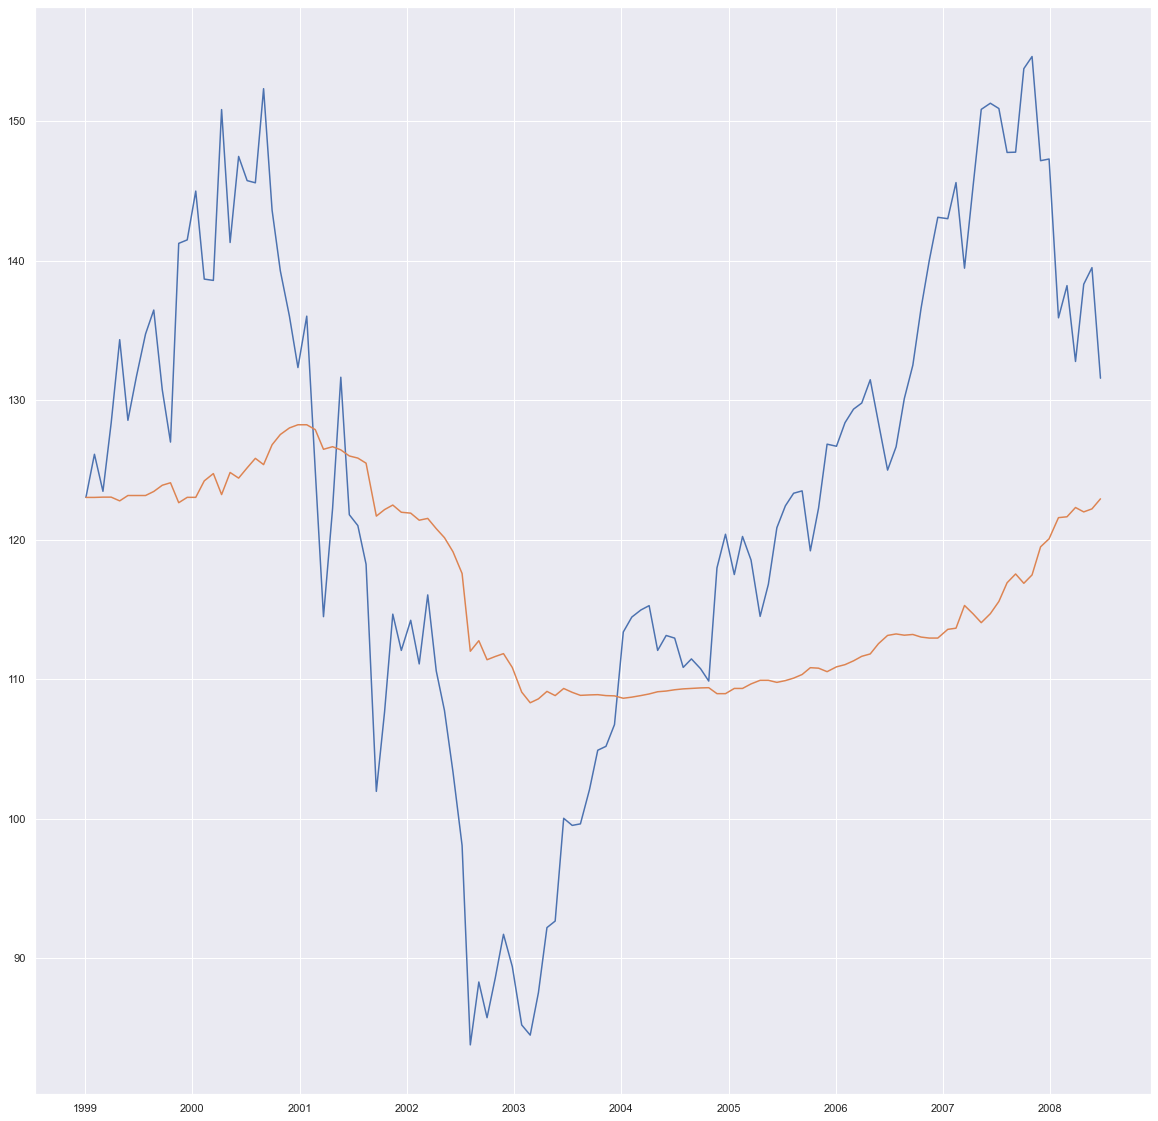

In [10]:
plt.figure(figsize=(20, 20))
plt.plot(dfValueAverage['Date'], dfValueAverage['SharePrice'])
plt.plot(dfValueAverage['Date'], dfValueAverage['ShareCost'])


In [7]:
increaseAmount = 600
Index = 0
cycle = 20
sharePrice = splg.values[Index][0]
shares = math.ceil(increaseAmount/sharePrice)
shareValue = shares*sharePrice
ininData = [[splg.index[Index],  0, Index, sharePrice, 0,
             shares, shares, shareValue, shareValue, shareValue, sharePrice, 0, 0]]
dfCurrencyAverage = pd.DataFrame(ininData, columns=['Date',  'ShareValueBeforePurchase', 'PriceIndex', 'SharePrice',  'newEarning', 'DeltaShare', 'Shares',
                                                    'PurchaseValue', 'ShareValue', 'Cost', 'ShareCost', 'Earning', 'EarningRate'])
index = dfCurrencyAverage.iloc[0]['PriceIndex']
dfCurrencyAverage


,Date,ShareValueBeforePurchase,PriceIndex,SharePrice,newEarning,DeltaShare,Shares,PurchaseValue,ShareValue,Cost,ShareCost,Earning,EarningRate
0,2007-01-03,0,0,16.137501,0,38,38,613.225029,613.225029,613.225029,16.137501,0,0


In [8]:
for i in range(1, 120):
    previousData = dfCurrencyAverage.iloc[i-1]
    newIndex = previousData['PriceIndex']+cycle
    currentSharePrice = splg.values[newIndex][0]
    currentShareValueBeforePurchase = currentSharePrice*previousData['Shares']
    if currentShareValueBeforePurchase > 20000:
        break
    newEarning = currentShareValueBeforePurchase-previousData['ShareValue']
    deltaShare = math.ceil(increaseAmount/currentSharePrice)
    currentShares = previousData['Shares']+deltaShare
    purchaceValue = deltaShare*currentSharePrice
    currentCost = previousData['Cost']+purchaceValue
    currentShareValue = currentShares*currentSharePrice
    currentEarning = currentShareValue-currentCost
    currentEarningRate = currentEarning*100/currentCost
    shareCost = currentCost/currentShares
    newData = [splg.index[newIndex],  currentShareValueBeforePurchase, newIndex, currentSharePrice, newEarning, deltaShare, currentShares,
               purchaceValue, currentShareValue, currentCost, shareCost, currentEarning, currentEarningRate]
    dfCurrencyAverage.loc[i] = newData

dfCurrencyAverage

,Date,ShareValueBeforePurchase,PriceIndex,SharePrice,newEarning,DeltaShare,Shares,PurchaseValue,ShareValue,Cost,ShareCost,Earning,EarningRate
0,2007-01-03,0.000000,0,16.137501,0.000000,38,38,613.225029,613.225029,613.225029,16.137501,0.000000,0.000000
1,2007-02-01,629.755009,20,16.572500,16.529980,37,75,613.182508,1242.937517,1226.407537,16.352100,16.529980,1.347837
2,2007-03-02,1201.124954,40,16.014999,-41.812563,38,113,608.569977,1809.694931,1834.977514,16.238739,-25.282583,-1.377814
3,2007-03-30,1839.357517,60,16.277500,29.662586,37,150,602.267506,2441.625023,2437.245020,16.248300,4.380003,0.179711
4,2007-04-30,2570.625114,80,17.137501,129.000092,36,186,616.950027,3187.575142,3054.195047,16.420403,133.380095,4.367111
5,2007-05-29,3241.980057,100,17.430000,54.404915,35,221,610.050011,3852.030067,3664.245058,16.580294,187.785009,5.124794
6,2007-06-26,3781.862331,120,17.112499,-70.167736,36,257,616.049973,4397.912304,4280.295031,16.654844,117.617273,2.747878
7,2007-07-25,4471.157265,140,17.397499,73.244961,35,292,608.912468,5080.069733,4889.207499,16.743861,190.862234,3.903746
8,2007-08-22,4907.060089,160,16.805000,-173.009644,36,328,604.980011,5512.040100,5494.187510,16.750572,17.852591,0.324936
9,2007-09-20,5735.899750,180,17.487499,223.859650,35,363,612.062473,6347.962223,6106.249983,16.821625,241.712240,3.958440


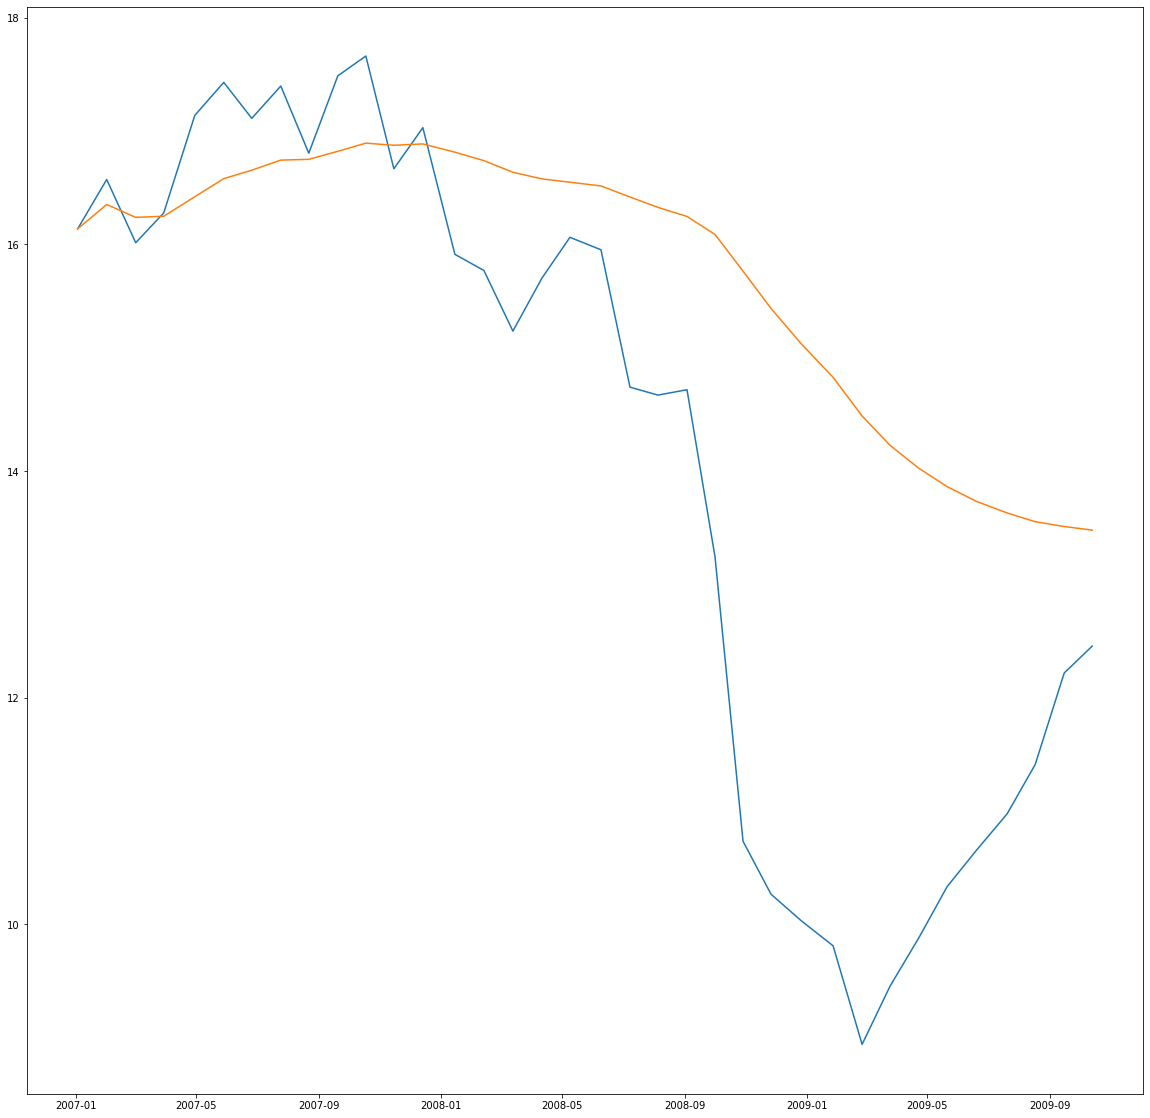

In [9]:

plt.figure(figsize=(20, 20))
plt.plot(dfCurrencyAverage['Date'], dfCurrencyAverage['SharePrice'])
plt.plot(dfCurrencyAverage['Date'], dfCurrencyAverage['ShareCost'])